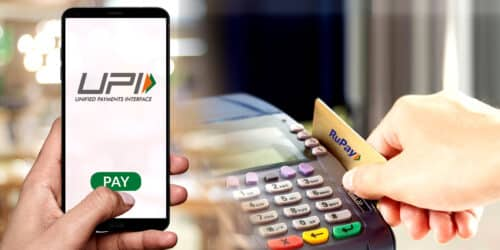

In [1]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_1/Problem_2/UPI-and-Rupay-Card.jpg', width = 800, height = 200)

# Problem Description:

Prepare a Machine Learning Model to predict the Persistency 13M Payment Behaviour at the New Business stage.

# Objective:

Using Machine Learning techniques, provide scores for each policy at the New Business stage the likelihood to pay the 13M premium.

Identify the segments where maximum non payers are captured.

# Dataset:

“Training” & “Test” Dataset with the raw input attributes and the 13M actual paid/not paid flag.

“Out of Time” Datasets would be provided with just the raw input attributes.

# Expected Steps:

 Conduct appropriate Data Treatments for e.g. Missing Value Imputation, Outlier treatment etc.
 
 Conduct required Feature Engineering for e.g. Binning, Ratio, Interaction, Polynomial  etc.
 
 Use any machine learning algorithm or combination of machine learning algorithms you deem fit.
 
 Prepare your model on the Train Data and you can evaluate the generalization capability of your model by using K-Fold Cross Validation, Leave One Out.
 
 Cross Validation or any other validation technique that you see appropriate.
 
 Score the Test and Out of Time Data and share it back to us along with the scored Train Data for evaluation. Also share all the Model Codes.

# 1. Import the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from patsy import dmatrices                
import sklearn
import statsmodels.api as sm
from scipy import stats
from scipy.special import factorial
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

# 2. Load the Dataset

By giving a parameter value for the file name (e.g. pd. read csv("filename. csv")), we may import tabular data from CSV files into pandas dataframes using the pandas package's read csv() method. Remember that we gave pandas an alias (pd), so will'll be calling pandas functions with pd.

In [3]:
df_train = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_2/Final_data.csv')
df_train.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,Y,1.0,10000000.0,HDFC BANK,bangalore,Tier I,"(6.999, 33.0]",...,10000000.0,North 1,2018,7,7,Delhi,Delhi,1,NN,3084.51
1,81.59,25000.0,42.0,N,3.0,145501.0,HDFC BANK,others,Tier III,"(41.0, 50.0]",...,145501.0,West,2018,3,31,Ahmedabad,Ahmedabad,1,NN,3426.78
2,87.58,35000.0,35.0,Y,2.0,800000.0,Ex-HDFC,jaipur,Tier II,"(50.0, 66.0]",...,1600000.0,North 2,2018,6,9,Jaipur,Jaipur,1,NN,3065.30
3,80.18,100000.0,12.0,Y,2.0,1000000.0,HDFC BANK,jaipur,Tier II,"(6.999, 33.0]",...,2000000.0,North 2,2018,2,21,Jaipur,Mumbai,1,NN,962.16
4,97.19,15000.0,45.0,Y,2.0,300000.0,HDFC BANK,others,Tier III,"(33.0, 41.0]",...,165000.0,West,2018,6,6,others,others,1,NN,4373.55


In [4]:
df_train.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Mapped Agent 13M Persistency                           25320 non-null  float64
 1   Applicant's Policy Annualized Premium                  25320 non-null  float64
 2   Mapped Agent Vintage                                   25320 non-null  float64
 3   Auto Debit of Premium Opted Flag(Yes/No)               25320 non-null  object 
 4   Application Life Assured BMI                           25320 non-null  float64
 5   Total Risk Exposure of HDFC Life w.r.t. Life Assured   25320 non-null  float64
 6   Application  Sourcing Channel                          25320 non-null  object 
 7   Application  Life Assured City                         25320 non-null  object 
 8   Application  Life Assured City Tier           

In [6]:
df_train.std()

Mapped Agent 13M Persistency                             1.439343e+01
Applicant's Policy Annualized Premium                    7.173271e+04
Mapped Agent Vintage                                     1.803208e+01
Application Life Assured BMI                             1.631083e+00
Total Risk Exposure of HDFC Life w.r.t. Life Assured     4.910357e+06
Application  Life Assured Income                         1.486164e+06
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')    3.064271e-01
Applicant's Policy Risk Cessation Term                   7.217959e+00
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')     4.996883e-01
Applicant's Policy Sum Assured                           2.685334e+06
Application Login year                                   2.972338e-01
Application Login month                                  3.717016e+00
Application Login day                                    9.387921e+00
Target                                                   4.152279e-01
Perf+vintage        

# 3. Label Encoding

Label encoding is the process of translating labels into a numeric format so that they may be read by machines. Machine learning algorithms can then make better decisions about how those labels should be used. In supervised learning, it is a crucial pre-processing step for the structured dataset.

In [7]:
label_encoder = preprocessing.LabelEncoder() 

Transform all the categorical columns using label encoder and get the unique values from those transformed columns

In [8]:
df_train['Auto Debit of Premium Opted Flag(Yes/No)']= label_encoder.fit_transform(df_train['Auto Debit of Premium Opted Flag(Yes/No)']) 
df_train['Auto Debit of Premium Opted Flag(Yes/No)'].unique() 

array([1, 0])

In [9]:
df_train['Application  Sourcing Channel']= label_encoder.fit_transform(df_train['Application  Sourcing Channel']) 
df_train['Application  Sourcing Channel'].unique() 

array([2, 1, 0, 3, 4, 5, 6])

In [10]:
df_train['Application  Life Assured City'] = label_encoder.fit_transform(df_train['Application  Life Assured City']) 
df_train['Application  Life Assured City'].unique() 

array([ 1, 10,  6, 11,  2,  9, 12,  4,  7,  0,  8,  5,  3, 13])

In [11]:
df_train['Application  Life Assured City Tier'] = label_encoder.fit_transform(df_train['Application  Life Assured City Tier']) 
df_train['Application  Life Assured City Tier'].unique() 

array([0, 2, 1])

In [12]:
df_train['Application  Life Assured Education'] = label_encoder.fit_transform(df_train['Application  Life Assured Education']) 
df_train['Application  Life Assured Education'].unique() 

array([ 4,  1,  0, 11,  6,  2,  3, 12,  7,  8,  5,  9, 10])

In [14]:
df_train['Application  Life Assured Gender'] = label_encoder.fit_transform(df_train['Application  Life Assured Gender']) 
df_train['Application  Life Assured Gender'].unique()

array([0, 1])

In [15]:
df_train['Application  Life Assured Industry'] = label_encoder.fit_transform(df_train['Application  Life Assured Industry']) 
df_train['Application  Life Assured Industry'].unique()

array([ 9, 10,  7,  8,  3,  2,  6,  1,  0,  4,  5])

In [16]:
df_train['Application  Life Assured Marital Status'] = label_encoder.fit_transform(df_train['Application  Life Assured Marital Status']) 
df_train['Application  Life Assured Marital Status'].unique() 

array([2, 1, 3, 0])

In [17]:
df_train['Application  Life Assured Occupation'] = label_encoder.fit_transform(df_train['Application  Life Assured Occupation']) 
df_train['Application  Life Assured Occupation'].unique() 

array([3, 4, 0, 2, 5, 6, 1])

In [18]:
df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"] = label_encoder.fit_transform(df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df_train["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique() 

array([0, 1, 2])

In [19]:
df_train['Application Specific Sourcing Partner'] = label_encoder.fit_transform(df_train['Application Specific Sourcing Partner']) 
df_train['Application Specific Sourcing Partner'].unique() 

array([ 44,  46,  70,  80,  29,  95,  78,  73,  39,   9,  57,  45,  49,
        31,  85, 111, 122,  14,  90, 115,  12,   7,  10,  18,  24,  91,
        66,  51,  19, 109,   8, 102, 114,  77,  83,  22,  88, 108,  96,
        67,  41,  84,   3,  30, 107,  52,  20,  21, 116,  42,  47, 120,
        58,   0,  64, 118, 112,  94,  28, 110,  75,  36,  62,  74, 113,
       125, 121,  48,  65, 106, 103,  60,   6,  93,  71,  55, 119,  59,
       117,   4,  15,  27,  50,  11,   5, 124,  82,  54,  79,  16,  43,
        26,  53, 105,  86,  33,  97, 101, 104, 123,  72,  37,  25,  63,
        87,  92,  99,  56,  23,  61,  40,  35,  69,  34,   1,  89,  76,
        68,   2, 100,  32,  81,  98,  17,  38,  13])

In [20]:
df_train['First Premium Payment Type'] = label_encoder.fit_transform(df_train['First Premium Payment Type']) 
df_train['First Premium Payment Type'].unique() 

array([4, 6, 1, 3, 7, 5, 8, 2, 0])

In [21]:
df_train["Applicant's Policy Product Category"] = label_encoder.fit_transform(df_train["Applicant's Policy Product Category"]) 
df_train["Applicant's Policy Product Category"].unique() 

array([2, 3, 1, 0])

In [22]:
df_train["Applicant's Policy Premium Payment Frequency"]= label_encoder.fit_transform(df_train["Applicant's Policy Premium Payment Frequency"]) 
df_train["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 2, 1, 3])

In [23]:
df_train["Applicant's Policy Product Name"]= label_encoder.fit_transform(df_train["Applicant's Policy Product Name"]) 
df_train["Applicant's Policy Product Name"].unique()

array([ 2,  7, 14,  4, 16,  1, 15, 17, 13,  6,  8, 10,  3,  9, 18,  5,  0,
       12, 11])

In [24]:
df_train['Application Life Assured Residential Status']= label_encoder.fit_transform(df_train['Application Life Assured Residential Status']) 
df_train['Application Life Assured Residential Status'].unique()

array([1, 0])

In [25]:
df_train['Application Life Assured State']= label_encoder.fit_transform(df_train['Application Life Assured State']) 
df_train['Application Life Assured State'].unique() 

array([ 3,  1,  8,  6,  5,  9,  4,  7, 10, 12,  0,  2, 11])

In [26]:
df_train['Application Sourcing Sub Channel']= label_encoder.fit_transform(df_train['Application Sourcing Sub Channel']) 
df_train['Application Sourcing Sub Channel'].unique() 

array([1, 3, 0, 2, 7, 6, 4, 5])

In [27]:
df_train['HDFC Life Operational Zone']= label_encoder.fit_transform(df_train['HDFC Life Operational Zone']) 
df_train['HDFC Life Operational Zone'].unique() 

array([1, 5, 2, 3, 4, 0])

In [28]:
df_train['Mapped Agent city']= label_encoder.fit_transform(df_train['Mapped Agent city']) 
df_train['Mapped Agent city'].unique() 

array([ 4,  0,  6, 10,  9,  3,  2,  7,  5,  8,  1])

In [29]:
df_train["Applicant's Policy Contract city"]= label_encoder.fit_transform(df_train["Applicant's Policy Contract city"]) 
df_train["Applicant's Policy Contract city"].unique() 

array([ 4,  0,  8, 10, 13, 11,  3,  2,  5,  9,  6,  7,  1, 12])

In [30]:
df_train["Application  Life Assured Age"]= label_encoder.fit_transform(df_train["Application  Life Assured Age"]) 
df_train["Application  Life Assured Age"].unique()

array([3, 1, 2, 0])

In [31]:
df_train["smoker_drinker"]= label_encoder.fit_transform(df_train["smoker_drinker"]) 
df_train["smoker_drinker"].unique()

array([0, 3, 2, 1])

# 4. Model Building

## 4.1 Logistic Regression for Statistical Analysis

In [32]:
df_train.dtypes

Mapped Agent 13M Persistency                             float64
Applicant's Policy Annualized Premium                    float64
Mapped Agent Vintage                                     float64
Auto Debit of Premium Opted Flag(Yes/No)                   int32
Application Life Assured BMI                             float64
Total Risk Exposure of HDFC Life w.r.t. Life Assured     float64
Application  Sourcing Channel                              int32
Application  Life Assured City                             int32
Application  Life Assured City Tier                        int32
Application  Life Assured Age                              int32
Application  Life Assured Education                        int32
Application  Life Assured Gender                           int32
Application  Life Assured Income                         float64
Application  Life Assured Industry                         int32
Application  Life Assured Marital Status                   int32
Application  Life Assured

In [33]:
df_train.drop(columns=['Application  Life Assured Marital Status', 'Application Login year',
                 'Application Login month','Application Login day',
                 'Mapped Agent city', 'Application  Life Assured City', 
            'Application Life Assured State','Application  Life Assured Education',
                'Application Life Assured Residential Status'], inplace=True)

In [35]:
df_train

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,1,1.0,10000000.0,2,0,3,0,...,1,40.0,1,1,10000000.0,1,4,1,0,3084.51
1,81.59,25000.0,42.0,0,3.0,145501.0,2,2,1,1,...,0,16.0,0,1,145501.0,5,0,1,0,3426.78
2,87.58,35000.0,35.0,1,2.0,800000.0,1,1,2,1,...,0,15.0,1,3,1600000.0,2,8,1,0,3065.30
3,80.18,100000.0,12.0,1,2.0,1000000.0,2,1,3,1,...,0,10.0,1,1,2000000.0,2,10,1,0,962.16
4,97.19,15000.0,45.0,1,2.0,300000.0,2,2,0,1,...,0,20.0,1,1,165000.0,5,13,1,0,4373.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,80.18,65000.0,1.0,0,2.0,2840000.0,1,2,3,1,...,0,20.0,1,3,5200000.0,1,13,0,0,80.18
25316,80.18,60000.0,6.0,0,2.0,2200000.0,1,1,3,1,...,0,25.0,1,3,4400000.0,0,7,0,0,481.08
25317,80.18,50000.0,9.0,0,2.0,350000.0,2,1,2,0,...,0,10.0,0,2,350000.0,1,13,0,0,721.62
25318,80.18,25000.0,11.0,0,2.0,625000.0,1,2,3,1,...,0,10.0,1,3,1250000.0,2,13,0,0,881.98


In [37]:
x = df_train.loc[:, df_train.columns != 'Target']
x

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,Applicant's Policy Product Name,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,1,1.0,10000000.0,2,0,3,0,...,2,1,40.0,1,1,10000000.0,1,4,0,3084.51
1,81.59,25000.0,42.0,0,3.0,145501.0,2,2,1,1,...,7,0,16.0,0,1,145501.0,5,0,0,3426.78
2,87.58,35000.0,35.0,1,2.0,800000.0,1,1,2,1,...,14,0,15.0,1,3,1600000.0,2,8,0,3065.30
3,80.18,100000.0,12.0,1,2.0,1000000.0,2,1,3,1,...,4,0,10.0,1,1,2000000.0,2,10,0,962.16
4,97.19,15000.0,45.0,1,2.0,300000.0,2,2,0,1,...,16,0,20.0,1,1,165000.0,5,13,0,4373.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,80.18,65000.0,1.0,0,2.0,2840000.0,1,2,3,1,...,4,0,20.0,1,3,5200000.0,1,13,0,80.18
25316,80.18,60000.0,6.0,0,2.0,2200000.0,1,1,3,1,...,4,0,25.0,1,3,4400000.0,0,7,0,481.08
25317,80.18,50000.0,9.0,0,2.0,350000.0,2,1,2,0,...,14,0,10.0,0,2,350000.0,1,13,0,721.62
25318,80.18,25000.0,11.0,0,2.0,625000.0,1,2,3,1,...,14,0,10.0,1,3,1250000.0,2,13,0,881.98


In [38]:
y = df_train['Target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

Statistical Analysis

* The statsmodels OLS() method. To do OLS regression, the api module is utilised. It yields an OLS object. The fit() function on this object is then invoked to fit the regression line to the data. The summary() function is used to generate a table that contains a detailed description of the regression findings.
* R-squared = R-squared (R2) is a statistical metric that quantifies the proportion of the variation explained by an independent variable or variables in a regression model for a dependent variable.
* Adj. R-squared = Adjusted R-squared is a variant of R-squared that takes into account the number of predictors in the model. When the additional term improves the model more than would be anticipated by chance, the adjusted R-squared rises. When a predictor improves the model by less than predicted, it declines.
* F-statistic = The F-statistic is just a two-variance ratio. Variances are a metric for data dispersion, or how far the data deviates from the mean. The phrase "mean squares" may be perplexing, but it merely refers to a population variance estimate that takes into account the degrees of freedom (DF) employed in the calculation.
* prob F-statistic = The overall significance of the regression is determined by Prob(F-Statistic). Unlike the t-statistic, which evaluates significance for individual variables, this is used to examine the significant level of all variables combined. The likelihood of the null hypothesis being true is depicted by Prob(F-statistics).
* Log-Likelihood = The likelihood (L) maximum and the log-likelihood (l) maximum are the same. A likelihood technique is a metric for determining how well a model fits the data; it describes how well a parameter () explains the observed data. Using the natural (base e) logarithm produces a more appealing graph with huge sums rather than products.
* AIC = The quality of a group of statistical models is compared using Akaike's information criterion (AIC). If you develop numerous regression models for different parameters such as education, family size, or handicap status, the AIC will rank them from best to worst.
* BIC = The Bayesian information criterion (BIC) is a model selection criteria for a finite number of models. It is closely connected to the Akaike information criterion (AIC) and is based in part on the likelihood function. In time series and linear regression, BIC has been frequently utilised for model identification.

In [39]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est = sm.OLS(y, X2.astype(float)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     409.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:03:41   Log-Likelihood:                -8944.3
No. Observations:               25320   AIC:                         1.795e+04
Df Residuals:                   25291   BIC:                         1.818e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

A correlation heatmap is a heatmap that depicts a two-dimensional correlation matrix between two discrete dimensions, with coloured pixels representing data on a monochromatic scale. The first dimension's values display as rows in the table, while the second dimension's values appear as columns.

In [40]:
Plot = df_train.corr()
Plot

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City Tier,Application Life Assured Age,Application Life Assured Gender,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
Mapped Agent 13M Persistency,1.000000,0.062682,-0.072860,0.047792,0.011831,0.027077,0.057366,-0.043713,0.013076,-0.024481,...,0.012340,-0.010099,-0.027292,0.017714,0.035358,0.028889,-0.009278,0.054259,-0.000301,0.261651
Applicant's Policy Annualized Premium,0.062682,1.000000,0.074067,0.051198,0.009783,0.203898,-0.046005,-0.185035,-0.032739,-0.106255,...,-0.196787,-0.160750,-0.163850,-0.129713,0.229791,0.059993,-0.079064,0.058102,-0.036397,0.095216
Mapped Agent Vintage,-0.072860,0.074067,1.000000,0.039876,-0.004827,0.007782,-0.119093,-0.000863,-0.010723,-0.030703,...,-0.037928,-0.032065,-0.038416,-0.130464,-0.018303,0.062624,0.050258,0.047135,-0.014578,0.931476
Auto Debit of Premium Opted Flag(Yes/No),0.047792,0.051198,0.039876,1.000000,-0.000340,0.005819,-0.005724,-0.048969,-0.013755,-0.072811,...,-0.002956,-0.009920,-0.043982,-0.068511,0.019097,0.006561,0.044435,0.545721,-0.045732,0.054250
Application Life Assured BMI,0.011831,0.009783,-0.004827,-0.000340,1.000000,0.024443,0.011912,-0.029927,-0.009994,0.025196,...,0.029005,0.038882,-0.021458,0.025751,0.032445,0.035603,-0.021323,0.003069,0.019894,0.000626
Total Risk Exposure of HDFC Life w.r.t. Life Assured,0.027077,0.203898,0.007782,0.005819,0.024443,1.000000,0.022608,-0.117557,-0.040377,0.040687,...,0.467116,0.406111,0.032277,0.105105,0.618561,0.095490,-0.054421,0.034091,0.121183,0.018326
Application Sourcing Channel,0.057366,-0.046005,-0.119093,-0.005724,0.011912,0.022608,1.000000,-0.005047,0.047907,-0.002967,...,0.132833,0.128582,-0.048032,0.406829,0.001991,0.026171,0.082321,-0.016493,0.036750,-0.098494
Application Life Assured City Tier,-0.043713,-0.185035,-0.000863,-0.048969,-0.029927,-0.117557,-0.005047,1.000000,0.005923,0.111682,...,-0.078697,-0.071645,0.064414,-0.069972,-0.153543,-0.162685,0.428705,-0.068534,-0.026944,-0.020812
Application Life Assured Age,0.013076,-0.032739,-0.010723,-0.013755,-0.009994,-0.040377,0.047907,0.005923,1.000000,-0.011606,...,-0.009637,0.011877,-0.034889,0.013915,-0.056641,-0.020743,-0.025894,-0.025997,-0.003903,-0.005817
Application Life Assured Gender,-0.024481,-0.106255,-0.030703,-0.072811,0.025196,0.040687,-0.002967,0.111682,-0.011606,1.000000,...,0.083739,0.072006,0.063287,0.037238,0.057534,0.010043,0.046426,-0.059488,0.061533,-0.038813


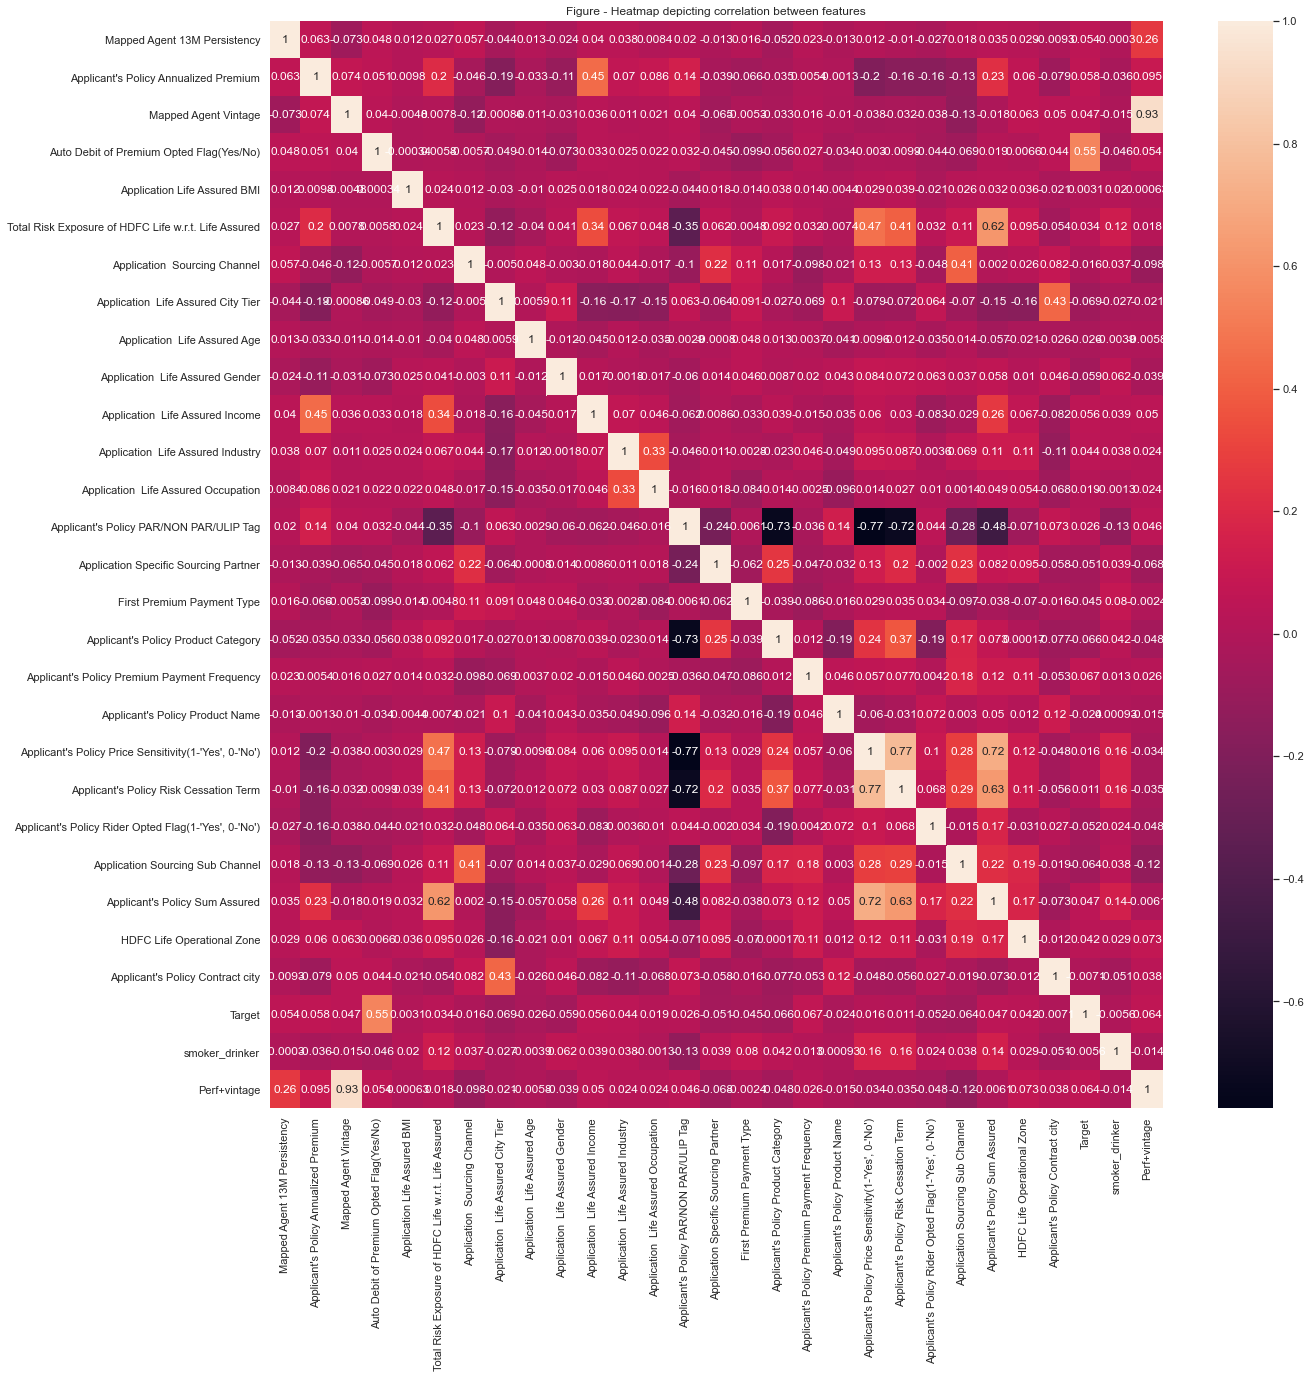

In [41]:
plt.figure( figsize = (20,20))
sns.heatmap(Plot, annot = True);
plt.title( "Figure - Heatmap depicting correlation between features");

## 4.2 Random Forest

In [43]:
x = df_train.loc[:, df_train.columns != 'Target']
x.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City Tier',
       'Application  Life Assured Age', 'Application  Life Assured Gender',
       'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')',
       'Applicant's Policy Risk Cessation Term',
       'Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')',
      

In [44]:
y = df_train['Target']
y

0        1
1        1
2        1
3        1
4        1
        ..
25315    0
25316    0
25317    0
25318    0
25319    1
Name: Target, Length: 25320, dtype: int64

## 4.3 Check the Feature Importance on Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
features_label = x.columns
forest = RandomForestClassifier (n_estimators = 100, random_state=0, n_jobs = -1)
forest.fit(x,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Mapped Agent 13M Persistency   0.273912
 2) Applicant's Policy Annualized Premium 0.073184
 3) Mapped Agent Vintage           0.064263
 4) Auto Debit of Premium Opted Flag(Yes/No) 0.059023
 5) Application Life Assured BMI   0.058885
 6) Total Risk Exposure of HDFC Life w.r.t. Life Assured 0.051690
 7) Application  Sourcing Channel  0.040130
 8) Application  Life Assured City Tier 0.033894
 9) Application  Life Assured Age  0.032083
10) Application  Life Assured Gender 0.031879
11) Application  Life Assured Income 0.029568
12) Application  Life Assured Industry 0.027852
13) Application  Life Assured Occupation 0.027613
14) Applicant's Policy PAR/NON PAR/ULIP Tag 0.024555
15) Application Specific Sourcing Partner 0.019414
16) First Premium Payment Type     0.019329
17) Applicant's Policy Product Category 0.018877
18) Applicant's Policy Premium Payment Frequency 0.018817
19) Applicant's Policy Product Name 0.018328
20) Applicant's Policy Price Sensitivity(1-'Yes', 0-'No') 0.014655
21)

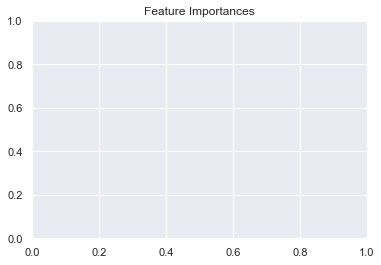

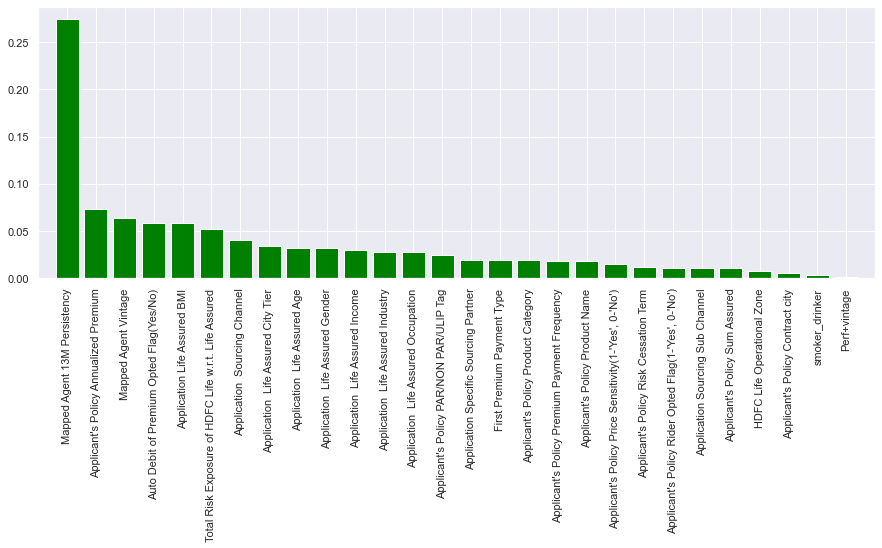

In [47]:
plt.title('Feature Importances')
plt.figure(figsize = (15,5))
plt.bar(range(x.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(x.shape[1]), features_label, rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

In [48]:
df_train.drop(columns=["Applicant's Policy Contract city"], inplace=True)

## 4.4 Using Power Transform to Transform the dataset

* The power transformation is described as a continuously changing function in a piece-wise function form with regard to the power parameter that is continuous at the point of singularity (= 0).
* The Box-Cox and Yeo-Johnson transformations are two methods for transforming a continuous (numeric) variable into a more regularly distributed variable. They're frequently utilised in feature engineering to eliminate raw variable skew.

In [49]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# Transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)

### Import the ML model building dependencies

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, recall_score, classification_report, precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Taking 70:30 Ratio of Training and testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x,df_train['Target'],test_size=0.30)

In [53]:
(X_train.shape, X_test.shape)

((17724, 28), (7596, 28))

In [54]:
(y_train.shape, y_test.shape)

((17724,), (7596,))

## 4.5 Logistic Regression

In [56]:
log_model = LogisticRegression(C = .5, penalty = 'l1', solver='liblinear')  
log_model.fit(X_train, y_train)
logr_train_score = log_model.score(X_train,y_train)
logr_test_score = log_model.score(X_test,y_test)  
pred_logr = log_model.predict(X_test)
log_acc1 = accuracy_score(pred_logr, y_test)
log_acc2 = roc_auc_score(pred_logr, y_test)
print('accuracy_score :',log_acc1)
print('roc_auc_score :',log_acc2)

accuracy_score : 0.8146392838335966
roc_auc_score : 0.7256879258175275


In [57]:
print('Coefficients: \n', log_model.coef_)

Coefficients: 
 [[ 3.86910812e-03 -4.21386412e-07 -5.65101276e-04  3.19781358e+00
   6.24712862e-03 -1.23652462e-09  1.00274556e-02 -8.24559126e-02
  -5.84945840e-02 -1.65808853e-01  6.56165777e-08  1.45839438e-02
  -2.59694583e-02  7.14273961e-02 -1.84325129e-03  2.41648971e-02
  -1.29453724e-01  4.55302421e-01 -9.68099821e-03  8.57864614e-03
   1.58208347e-02 -2.49680285e-01 -8.00263955e-02  3.24491741e-08
   3.91954290e-02 -1.26611993e-02  8.85813636e-02  5.67148320e-05]]


In [58]:
print(confusion_matrix(y_test, pred_logr))

[[ 941  692]
 [ 716 5247]]


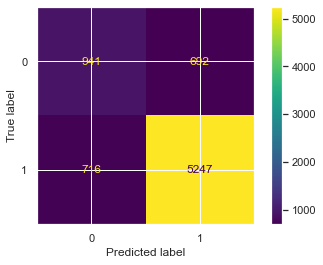

In [60]:
plot_confusion_matrix(log_model, X_test, y_test)

In [61]:
print(classification_report(pred_logr, y_test))

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1657
           1       0.88      0.88      0.88      5939

    accuracy                           0.81      7596
   macro avg       0.73      0.73      0.73      7596
weighted avg       0.81      0.81      0.81      7596



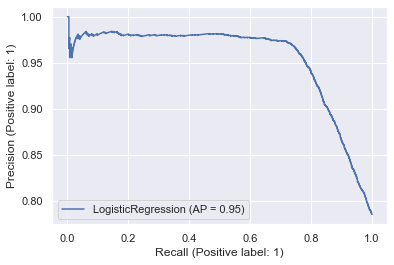

In [62]:
plot_precision_recall_curve(log_model, X_test, y_test)

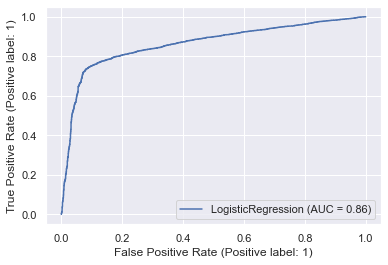

In [63]:
plot_roc_curve(log_model, X_test, y_test)

## 4.6 Random Forest and using RandomizedSearchCV

#### Random Forest

In [64]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc1 = accuracy_score(rfc_pred, y_test)
rfc_acc2 = roc_auc_score(rfc_pred, y_test)
print('accuracy_score :',rfc_acc1)
print('roc_auc_score :',rfc_acc2)

accuracy_score : 0.8189836756187467
roc_auc_score : 0.7312435755706832


In [65]:
print(confusion_matrix(y_test, rfc_pred))

[[ 894  739]
 [ 636 5327]]


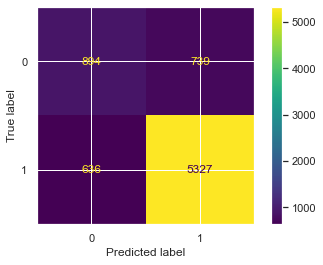

In [67]:
plot_confusion_matrix(rfc, X_test, y_test)

In [68]:
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1530
           1       0.89      0.88      0.89      6066

    accuracy                           0.82      7596
   macro avg       0.72      0.73      0.73      7596
weighted avg       0.82      0.82      0.82      7596



In [70]:
# AUC score of Random Forest
RF_probability_Values = rfc.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, RF_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.8660455026860373


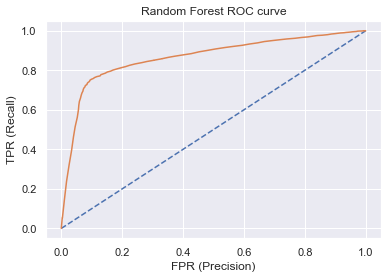

In [71]:
# Calculate roc_curve
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, RF_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

#### RandomizedSearchCV

In [72]:
# Initialize the parameters for param_distributions for Randomized Search CV
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

In [75]:
model_RFC = RandomForestClassifier()
RF_model = RandomizedSearchCV(estimator = model_RFC, param_distributions = parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
RF_model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [76]:
pred_RF = RF_model.predict(X_test)
RF_acc1 = accuracy_score(pred_RF, y_test)
print('accuracy_score :',RF_acc1)

accuracy_score : 0.8191153238546603


In [77]:
print(confusion_matrix(y_test, pred_RF))

[[ 654  979]
 [ 395 5568]]


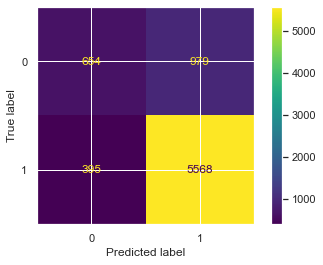

In [78]:
plot_confusion_matrix(RF_model, X_test, y_test)

In [79]:
print(classification_report(pred_RF, y_test))

              precision    recall  f1-score   support

           0       0.40      0.62      0.49      1049
           1       0.93      0.85      0.89      6547

    accuracy                           0.82      7596
   macro avg       0.67      0.74      0.69      7596
weighted avg       0.86      0.82      0.83      7596



In [81]:
# AUC score of Random Forest
RF_probability_Values = RF_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, RF_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.8754223200653878


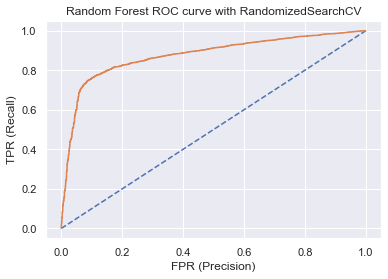

In [99]:
# Calculate roc_curve
plt.title('Random Forest ROC curve with RandomizedSearchCV')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, RF_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

## 4.7 GridSearchCV

* GridSearchCV is a library function in the model selection package of sklearn. It aids in fitting your estimator (model) to your training data by looping over specified hyperparameters. Finally, you may choose the optimal parameters from the hyperparameters presented.
* When the grid search is run with several parameters, the scorer func determines which one has the greatest score. The information for the parameters that resulted in the greatest score is provided by the best estimator. s.

In [83]:
# Initialize the parameters for param_distributions for Grid Search CV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}

In [84]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [85]:
print('The best parameters for GridSearchCV are:', grid_search.best_params_)

The best parameters for GridSearchCV are: {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [93]:
print('The optimal accuracy score we can get for GridSearchCV is:', grid_search.best_score_)

The optimal accuracy score we can get for GridSearchCV is: 0.8151658767772512


In [92]:
pred_GCV = grid_search.predict(X_test)
GCV_acc1 = accuracy_score(pred_GCV, y_test)
print('accuracy_score :', GCV_acc1)

accuracy_score : 0.8234597156398105


But we got an accuracy score of 0.82

In [94]:
print(confusion_matrix(y_test, pred_GCV))

[[ 959  674]
 [ 667 5296]]


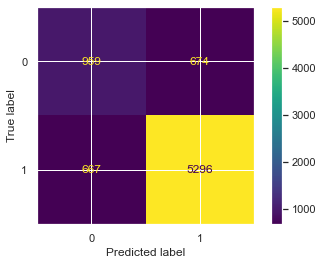

In [95]:
plot_confusion_matrix(grid_search, X_test, y_test)

In [96]:
print(classification_report(pred_GCV, y_test))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1626
           1       0.89      0.89      0.89      5970

    accuracy                           0.82      7596
   macro avg       0.74      0.74      0.74      7596
weighted avg       0.82      0.82      0.82      7596



In [97]:
# AUC score of Random Forest
GCV_probability_Values = grid_search.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, GCV_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.8716447897367507


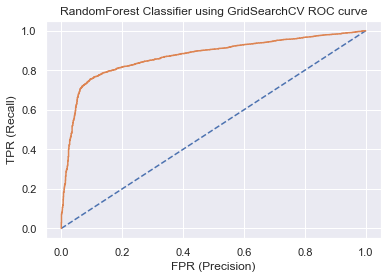

In [106]:
# Calculate roc_curve
plt.title('RandomForest Classifier using GridSearchCV ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, GCV_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

# 5. Models which perform better

Accuracy of Logistic Regression :  0.8146392838335966
Accuracy of Random Forest Classifier :  0.8189836756187467
Accuracy of Random Forest Classifier with RandonSearchCV :  0.8191153238546603
Accuracy of RandomForest Classifier using GridSearchCV :  0.8234597156398105


(0.6, 1.0)

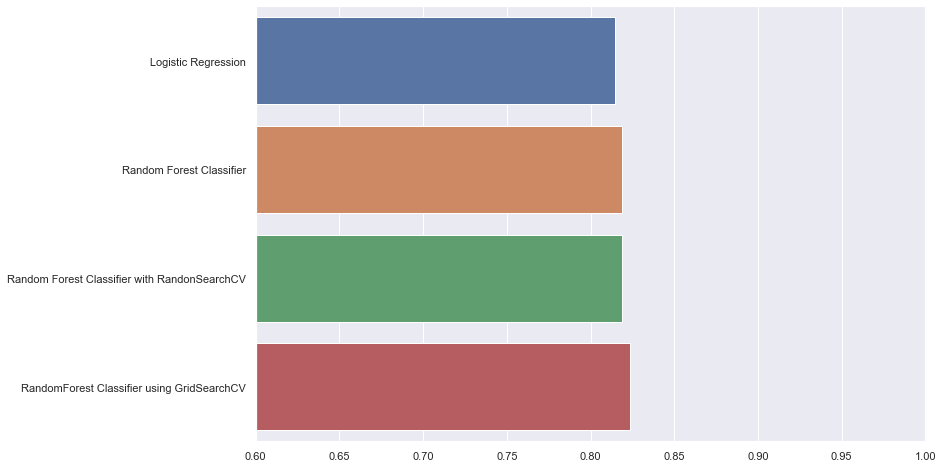

In [107]:
print("Accuracy of Logistic Regression : ",log_acc1)
print("Accuracy of Random Forest Classifier : ",rfc_acc1)
print("Accuracy of Random Forest Classifier with RandonSearchCV : ",RF_acc1)
print("Accuracy of RandomForest Classifier using GridSearchCV : ",GCV_acc1)
models_acc=[log_acc1,rfc_acc1,RF_acc1,GCV_acc1]
names_of_models=['Logistic Regression', 'Random Forest Classifier', 'Random Forest Classifier with RandonSearchCV', 'RandomForest Classifier using GridSearchCV']
sns.barplot(y=names_of_models,x=models_acc)
plt.gcf().set_size_inches(12,8)
plt.xlim([0.6,1.0])

After observing all the model, we will perform our predicion on df_test data using RandomForest Classifier using GridSearchCV. Where RandomForest Classifier using GridSearchCV gives an accuracy of 82%

# 6. Submissions

In [131]:
df_test = pd.read_csv("E:/PIP_Devmallya/Week_1/Problem_2/Final_data_test.csv")
df_test.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [132]:
df_test.shape

(7515, 37)

Label encoding on the test data on each categorical columns

In [133]:
df_test['Auto Debit of Premium Opted Flag(Yes/No)'] = label_encoder.fit_transform(df_test['Auto Debit of Premium Opted Flag(Yes/No)']) 
df_test['Auto Debit of Premium Opted Flag(Yes/No)'].unique()

array([0, 1])

In [134]:
df_test['Application  Sourcing Channel'] = label_encoder.fit_transform(df_test['Application  Sourcing Channel']) 
df_test['Application  Sourcing Channel'].unique() 

array([2, 1, 0, 5, 3, 4, 6])

In [135]:
df_test['Application  Life Assured City Tier'] = label_encoder.fit_transform(df_test['Application  Life Assured City Tier']) 
df_test['Application  Life Assured City Tier'].unique()

array([2, 0, 1])

In [136]:
df_test['Application  Life Assured Gender'] = label_encoder.fit_transform(df_test['Application  Life Assured Gender']) 
df_test['Application  Life Assured Gender'].unique()

array([0, 1])

In [137]:
df_test['Application  Life Assured Industry'] = label_encoder.fit_transform(df_test['Application  Life Assured Industry']) 
df_test['Application  Life Assured Industry'].unique()

array([ 0, 12,  4,  9,  1,  6,  8,  5,  7, 10,  3,  2, 11])

In [138]:
df_test['Application  Life Assured Occupation'] = label_encoder.fit_transform(df_test['Application  Life Assured Occupation']) 
df_test['Application  Life Assured Occupation'].unique()

array([3, 2, 0, 1, 4])

In [139]:
df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"] = label_encoder.fit_transform(df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"]) 
df_test["Applicant's Policy PAR/NON PAR/ULIP Tag"].unique()

array([2, 1, 0])

In [140]:
df_test['Application Specific Sourcing Partner'] = label_encoder.fit_transform(df_test['Application Specific Sourcing Partner']) 
df_test['Application Specific Sourcing Partner'].unique() 

array([31, 33, 61, 72, 38, 36, 32, 53, 22, 35, 52, 12, 25, 71, 20,  5, 34,
        7, 75, 74, 42, 46, 13, 50, 47, 51, 16, 37, 10, 60, 67, 17, 28, 27,
       14, 68, 49, 58,  8, 24, 55, 45, 63, 54, 56,  4, 23, 39, 62, 19, 76,
       41, 70,  6, 26, 15,  2, 57, 69, 11, 65, 48, 21, 59,  3, 29, 66, 18,
       30,  0, 43, 40, 73,  1, 64, 44,  9])

In [141]:
df_test['First Premium Payment Type'] = label_encoder.fit_transform(df_test['First Premium Payment Type']) 
df_test['First Premium Payment Type'].unique() 

array([3, 1, 6, 4, 7, 8, 2, 5, 0])

In [142]:
df_test["Applicant's Policy Product Category"] = label_encoder.fit_transform(df_test["Applicant's Policy Product Category"]) 
df_test["Applicant's Policy Product Category"].unique() 

array([1, 3, 2, 0])

In [143]:
df_test["Applicant's Policy Premium Payment Frequency"] = label_encoder.fit_transform(df_test["Applicant's Policy Premium Payment Frequency"]) 
df_test["Applicant's Policy Premium Payment Frequency"].unique() 

array([0, 1, 2, 3])

In [144]:
df_test["Applicant's Policy Product Name"] = label_encoder.fit_transform(df_test["Applicant's Policy Product Name"]) 
df_test["Applicant's Policy Product Name"].unique()

array([ 4, 14,  1, 17, 15,  8, 16,  2, 18, 13,  3,  7,  9,  6,  0,  5, 11,
       10, 12])

In [145]:
df_test['Application Life Assured State'] = label_encoder.fit_transform(df_test['Application Life Assured State']) 
df_test['Application Life Assured State'].unique() 

array([ 2,  6,  4,  8,  0,  9,  7, 12, 10,  1,  3,  5, 11])

In [146]:
df_test['Application Sourcing Sub Channel'] = label_encoder.fit_transform(df_test['Application Sourcing Sub Channel']) 
df_test['Application Sourcing Sub Channel'].unique() 

array([1, 3, 0, 8, 4, 6, 7, 5, 2])

In [147]:
df_test['HDFC Life Operational Zone'] = label_encoder.fit_transform(df_test['HDFC Life Operational Zone']) 
df_test['HDFC Life Operational Zone'].unique() 

array([1, 5, 4, 2, 3, 0])

In [148]:
df_test["Application  Life Assured Age"] = label_encoder.fit_transform(df_test["Application  Life Assured Age"]) 
df_test["Application  Life Assured Age"].unique()

array([0, 1, 3, 2])

In [149]:
df_test["smoker_drinker"] = label_encoder.fit_transform(df_test["smoker_drinker"]) 
df_test["smoker_drinker"].unique()

array([0, 3, 2, 1])

In [150]:
df_test

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,smoker_drinker,Perf+vintage
0,80.32,99999,11.0,0,2.0,999990.0,2,others,2,0,...,1,1999980.0,1,2017,12,30,others,others,0,883.52
1,80.32,60000,22.0,1,2.0,600000.0,2,pune,0,1,...,1,1200000.0,5,2018,10,1,Pune,Pune,0,1767.04
2,80.32,50000,6.0,0,2.0,950000.0,1,others,2,3,...,3,1900000.0,4,2018,5,14,others,others,0,481.92
3,80.32,25000,3.0,1,2.0,250000.0,2,others,2,0,...,1,500000.0,2,2018,6,8,others,others,0,240.96
4,23.73,95693,28.0,1,2.0,686457.0,0,others,2,2,...,0,686458.0,5,2018,4,18,Mumbai,Delhi,0,664.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,80.32,50000,33.0,0,2.0,500000.0,2,others,1,0,...,1,500000.0,1,2018,4,27,others,others,0,2650.56
7511,80.32,25000,8.0,1,3.0,250000.0,2,others,1,1,...,2,500000.0,1,2019,1,28,others,others,0,642.56
7512,80.32,25260,19.0,1,2.0,10000000.0,0,others,1,0,...,0,14500000.0,0,2018,7,18,others,others,0,1526.08
7513,90.98,50000,59.0,1,2.0,500000.0,1,others,2,0,...,4,500000.0,5,2018,5,20,others,others,0,5367.82


In [153]:
df_test.drop(columns=['Application  Life Assured Marital Status', 'Application Login year',
                 'Application Login month','Application Login day',
                 'Mapped Agent city', 'Application  Life Assured City', 
            'Application Life Assured State','Application  Life Assured Education',
                'Application Life Assured Residential Status'], inplace=True)

In [157]:
df_test.drop(columns = ['Applicant\'s Policy Contract city'], inplace = True)

Droped the unnecessary columns from the test dataset

In [158]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7515 entries, 0 to 7514
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Mapped Agent 13M Persistency                           7515 non-null   float64
 1   Applicant's Policy Annualized Premium                  7515 non-null   int64  
 2   Mapped Agent Vintage                                   7515 non-null   float64
 3   Auto Debit of Premium Opted Flag(Yes/No)               7515 non-null   int32  
 4   Application Life Assured BMI                           7515 non-null   float64
 5   Total Risk Exposure of HDFC Life w.r.t. Life Assured   7515 non-null   float64
 6   Application  Sourcing Channel                          7515 non-null   int32  
 7   Application  Life Assured City Tier                    7515 non-null   int32  
 8   Application  Life Assured Age                   

In [172]:
final_pred_GCV = grid_search.predict(df_test)
final_pred_GCV

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [167]:
submission = pd.DataFrame(data = final_pred_GCV)
submission.columns = ['Test_Target']

In [168]:
submission.head()

,Test_Target
0,1
1,1
2,0
3,1
4,1


In [169]:
submission.to_csv('E:/PIP_Devmallya/Week_1/Problem_2/submissions.csv', index = False)